In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.13.0


In [2]:
"""
DATA CLEANING
"""

dataset = pd.read_csv("table_EUROfusion_db_JSimpson_24april2019_D_withpellets_normp_nokikcs_only_validated.dat",index_col=False,sep="\s{3,}|\s{3,}|\t+|\s{3,}\t+|\t+\s{3,}",skipinitialspace=True)
print(dataset.iloc[:,0])
print(dataset.iloc[:,1])
print(dataset.columns)
dataset.columns = ["shot","t1","t2","Te_ped_height_pre-ELM_(keV)","error","ne_ped_height_pre-ELM__10^19(m^-3)","error.1","pe_ped_height_pre-ELM_(kPa)","error.2","separatrix_n_e_10^19(m^-3)","error.3","Ip_(MA)","error.4","P_tot_(MW)","error.5","P_NBI_(MW)","error.6","P_ICRH(MW)","error.7","triangularity","error.8","Meff","error.9","B_(T)","error.10","gas_flow_rate_of_main_species_10^22__(e/s)","error.11","electron_rate_from_GIM__1_(e/s)","error.12","electron_rate_from_GIM__2_(e/s)","error.13","electron_rate_from_GIM__3_(e/s)","error.14","electron_rate_from_GIM__4_(e/s)","error.15","electron_rate_from_GIM__5_(e/s)","error.16","electron_rate_from_GIM__6_(e/s)","error.17","electron_rate_from_GIM__7_(e/s)","error.18","electron_rate_from_GIM__8_(e/s)","error.19","electron_rate_from_GIM__9_(e/s)","error.20","electron_rate_from_GIM_10_(e/s)","error.21","electron_rate_from_GIM_11_(e/s)","error.22","electron_rate_from_GIM_12_(e/s)","error.23","electron_rate_from_GIM_13_(e/s)","error.24","electron_rate_from_GIM_14_(e/s)","error.25","electron_rate_from_GIM_15_(e/s)","error.26","Atomic_number_of_seeded_impurity","error.27","flow_rate_of_seeded_impurity_10^22_(e/s)","error.28","FLAG:_DEUTERIUM","FLAG:_HYDROGEN","FLAG:_H/D_mix","FLAG:_He_JET-C","FLAG:_Seeding","FLAG:_He_seeding","FLAG:_Kicks","FLAG:_RMP","FLAG:_pellets","FLAG:_JET-C","FLAG:_JET-ILW","FLAG:_HRTS_data_validated","divertor_configuration"]
#data = dataset.dropna() DOESN'T WORK as NaN values exist for all flags
data = dataset
#data.columns = data.columns.str.replace(" ","_")
print(data)

C:\Users\Sophie\AppData\Local\Temp\ipykernel_15508\1031992411.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dataset = pd.read_csv("table_EUROfusion_db_JSimpson_24april2019_D_withpellets_normp_nokikcs_only_validated.dat",index_col=False,sep="\s{3,}|\s{3,}|\t+|\s{3,}\t+|\t+\s{3,}",skipinitialspace=True)


0      81768
1      81771
2      81794
3      81795
4      81798
       ...  
854    92434
855    92436
856    92437
857    92442
858    92442
Name: shot, Length: 859, dtype: int64
0      49.17
1      48.97
2      52.85
3      53.60
4      53.59
       ...  
854    49.05
855    49.48
856    50.77
857    52.96
858    51.79
Name: t1, Length: 859, dtype: float64
Index(['shot', 't1', 't2', 'Te ped height pre-ELM (keV)', 'error',
       'ne ped height pre-ELM  10^19(m^-3)', 'error.1',
       'pe ped height pre-ELM (kPa)', 'error.2', 'separatrix n_e 10^19(m^-3)',
       'error.3', 'Ip (MA)', 'error.4', 'P_tot (MW)', 'error.5', 'P_NBI (MW)',
       'error.6', 'P_ICRH(MW)', 'error.7', 'triangularity', 'error.8', 'Meff',
       'error.9', 'B (T)', 'error.10',
       'gas flow rate of main species 10^22  (e/s)', 'error.11',
       'electron rate from GIM  1 (e/s)', 'error.12',
       'electron rate from GIM  2 (e/s)', 'error.13',
       'electron rate from GIM  3 (e/s)', 'error.14',
       'elec

In [3]:
list(data.columns)

['shot',
 't1',
 't2',
 'Te_ped_height_pre-ELM_(keV)',
 'error',
 'ne_ped_height_pre-ELM__10^19(m^-3)',
 'error.1',
 'pe_ped_height_pre-ELM_(kPa)',
 'error.2',
 'separatrix_n_e_10^19(m^-3)',
 'error.3',
 'Ip_(MA)',
 'error.4',
 'P_tot_(MW)',
 'error.5',
 'P_NBI_(MW)',
 'error.6',
 'P_ICRH(MW)',
 'error.7',
 'triangularity',
 'error.8',
 'Meff',
 'error.9',
 'B_(T)',
 'error.10',
 'gas_flow_rate_of_main_species_10^22__(e/s)',
 'error.11',
 'electron_rate_from_GIM__1_(e/s)',
 'error.12',
 'electron_rate_from_GIM__2_(e/s)',
 'error.13',
 'electron_rate_from_GIM__3_(e/s)',
 'error.14',
 'electron_rate_from_GIM__4_(e/s)',
 'error.15',
 'electron_rate_from_GIM__5_(e/s)',
 'error.16',
 'electron_rate_from_GIM__6_(e/s)',
 'error.17',
 'electron_rate_from_GIM__7_(e/s)',
 'error.18',
 'electron_rate_from_GIM__8_(e/s)',
 'error.19',
 'electron_rate_from_GIM__9_(e/s)',
 'error.20',
 'electron_rate_from_GIM_10_(e/s)',
 'error.21',
 'electron_rate_from_GIM_11_(e/s)',
 'error.22',
 'electron_rate_fro

In [4]:
"""
SPLIT TRAIN AND TEST DATA
"""

train_data, test_data = np.split(data.sample(frac=1,random_state=42),[int(.8*len(data))]) # this works!
print(type(train_data))
print(train_data.iloc[:5])

train_plot_data = pd.DataFrame(train_data.iloc[:100])
print(type(train_plot_data))
print(train_plot_data)

print(train_data.size) # check sizes
print(test_data.size)

<class 'pandas.core.frame.DataFrame'>


      shot     t1     t2  Te_ped_height_pre-ELM_(keV)     error  \
714  90132  52.18  53.76                     0.608486  0.013401   
605  87349  45.46  46.83                     0.515264  0.033111   
120  82645  58.96  62.83                     0.265495  0.011125   
208  83308  49.62  54.67                     0.669282  0.010121   
380  84742  49.74  51.52                     0.665852  0.036241   

     ne_ped_height_pre-ELM__10^19(m^-3)   error.1  \
714                            5.628813  0.059389   
605                            2.847098  0.060572   
120                            3.186245  0.040875   
208                            7.867919  0.066672   
380                            5.811067  0.097145   

     pe_ped_height_pre-ELM_(kPa)   error.2  separatrix_n_e_10^19(m^-3)  ...  \
714                     5.482068  0.133872                    2.626194  ...   
605                     2.308439  0.156261                    1.892279  ...   
120                     1.379733  0.0604

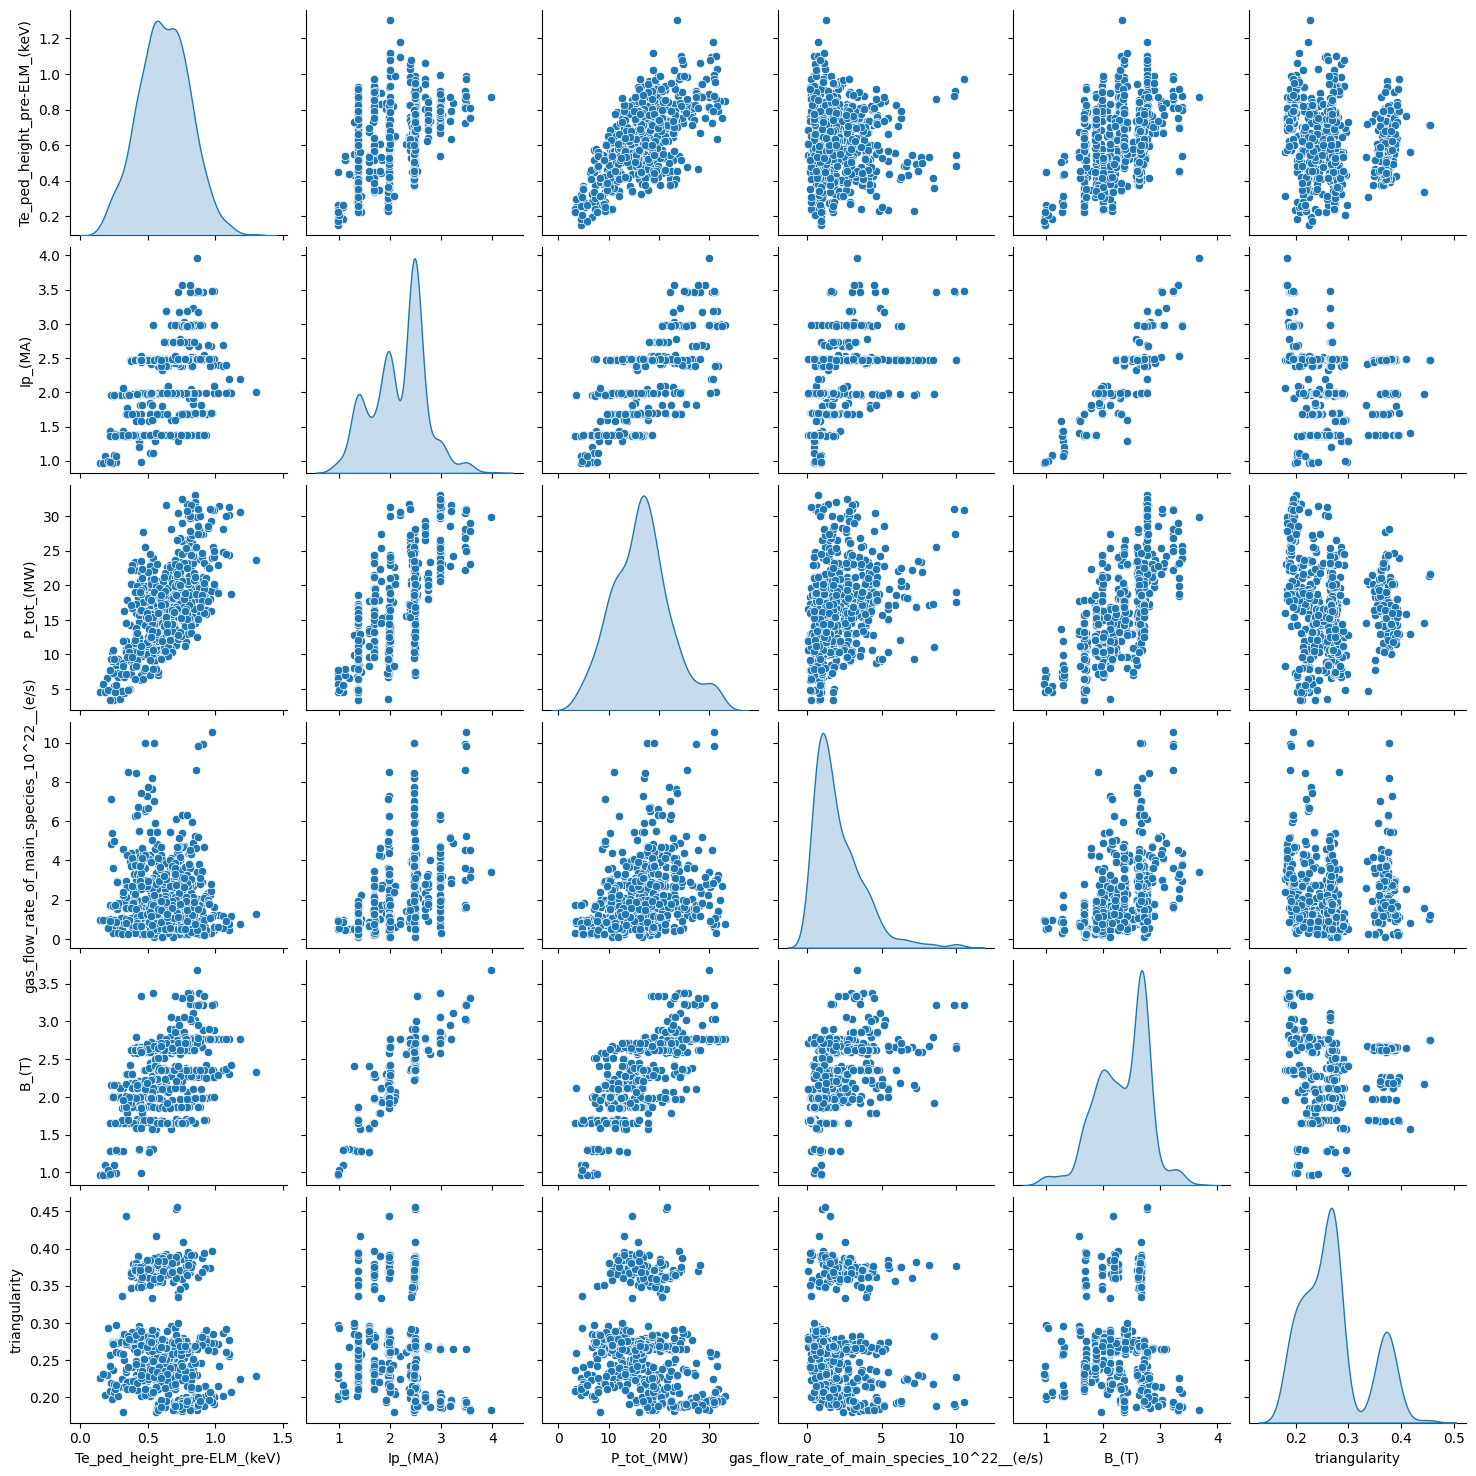

In [5]:
"""
INSPECT DATA
"""

import seaborn as sns

"""
The line below means we have shot numbers corresponding with the test inputs, useful for plotting at the end. It's a separate DF as we don't want to
include the shots as a feature in the neural network input.
"""

relevant_with_shots = test_data[["shot","Ip_(MA)","P_tot_(MW)","gas_flow_rate_of_main_species_10^22__(e/s)","B_(T)","triangularity"]]

traininput = train_data[["Ip_(MA)","P_tot_(MW)","gas_flow_rate_of_main_species_10^22__(e/s)","B_(T)","triangularity"]]
trainoutput = train_data[["Te_ped_height_pre-ELM_(keV)"]]

testinput = test_data[["Ip_(MA)","P_tot_(MW)","gas_flow_rate_of_main_species_10^22__(e/s)","B_(T)","triangularity"]]
testoutput = test_data[["Te_ped_height_pre-ELM_(keV)"]]

sns.pairplot(train_data[["Te_ped_height_pre-ELM_(keV)","Ip_(MA)","P_tot_(MW)","gas_flow_rate_of_main_species_10^22__(e/s)","B_(T)","triangularity"]],diag_kind = "kde")
# appears to be a correlation between Te_ped and P_tot, current and B-field

In [6]:
"""
INPUTS & NORMALISATION LAYERS
"""
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(traininput))

In [7]:
"""
MODEL BUILDING
The model takes in an input. The input activates certain neurons in the next layer, which activates certain neurons in the next.
There are only a few neurons in the final layer, representing the final classifications.
The idea is that there exists a model which will allow any rock input to activate the rock output, any paper input to activate paper output, etc.
To find this model, we make random guesses and see how well it works.
"""

def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(128,activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(128,activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(1)
    ])
    model.compile(loss="mean_absolute_error",optimizer=tf.keras.optimizers.Adam(0.0005))
    return model

dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 5)                 11        
 on)                                                             
                                                                 
 dense (Dense)               (None, 128)               768       
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                        

In [8]:
"""
TRAINING
"""

history = dnn_model.fit(x=traininput,y=trainoutput,validation_data=(testinput,testoutput),verbose=0,epochs=50,batch_size=8)

In [9]:
"""
PREDICTION
"""
predicted_te_ped = dnn_model.predict(testinput)

6/6 [==============================] - 0s 4ms/step


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 5)                 11        
 on)                                                             
                                                                 
 dense (Dense)               (None, 128)               768       
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                        

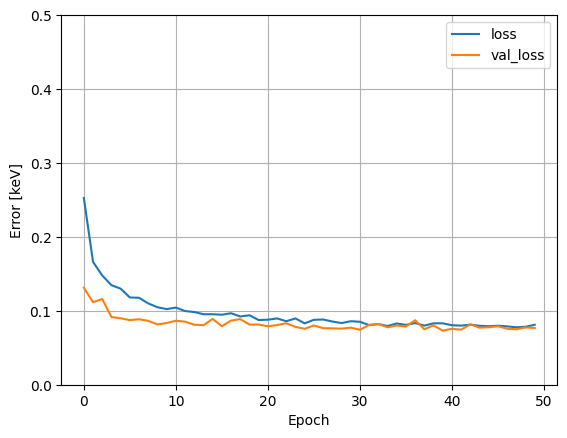

In [10]:
"""
COMPILING
The loss finds the mean error, then the optimizer aims to minimise this by changing the weights.
"""
dnn_model.summary()

def plot_loss(history):
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.ylim([0,0.5])
    plt.xlabel("Epoch")
    plt.ylabel("Error [keV]")
    plt.legend()
    plt.grid(True)

plot_loss(history)
plt.show()

In [11]:
print(predicted_te_ped.tolist())
print(np.shape(predicted_te_ped))

flat_ped = []
for sublist in predicted_te_ped.tolist():
    for item in sublist:
        flat_ped.append(item)
print(flat_ped)
print(len(flat_ped))
print(len(testinput))

[[0.7238032817840576], [0.6179677248001099], [0.6777917146682739], [0.6217031478881836], [0.5407867431640625], [0.6418364644050598], [0.4656056761741638], [0.5852039456367493], [0.49573081731796265], [0.5338817238807678], [0.519140362739563], [0.6450416445732117], [0.7241966724395752], [0.5239036679267883], [0.819187581539154], [0.4883875846862793], [0.6166620850563049], [0.678176760673523], [0.6942612528800964], [0.8136942386627197], [0.5321992635726929], [0.47351396083831787], [0.6331420540809631], [0.6760625839233398], [0.586236834526062], [0.5326371788978577], [0.47628968954086304], [0.6820691227912903], [0.6813021302223206], [0.7390371561050415], [0.6969332098960876], [0.7161484360694885], [0.9353493452072144], [0.3990386724472046], [0.5384160876274109], [0.6467936038970947], [0.8641679286956787], [0.7852956056594849], [0.6409729719161987], [0.6386485695838928], [0.6719357371330261], [0.3793381154537201], [0.5992484092712402], [0.5320053696632385], [0.3302939832210541], [0.5805379

In [12]:
print(len(train_data["shot"]))

print(len(traininput))
print(np.shape(traininput))
print(len(trainoutput))
print(np.shape(trainoutput))

687
687
(687, 5)
687
(687, 1)


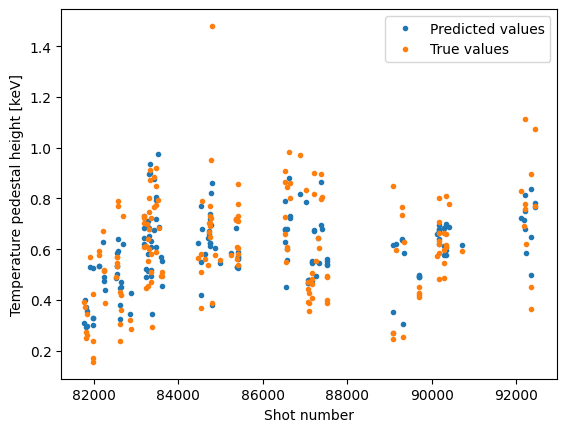

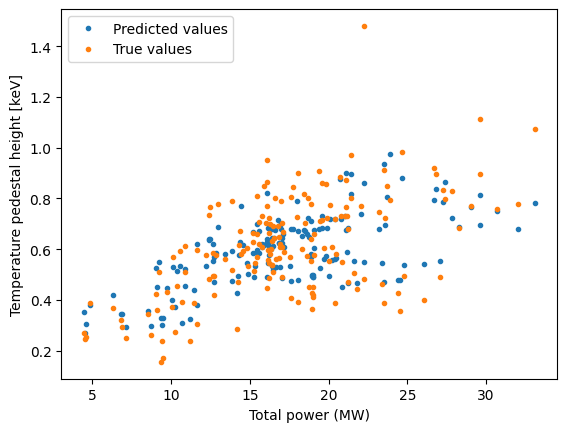

In [13]:
"""
PLOTTING

change this to plot pedestal height predictions against shot number
"""

x = np.array(relevant_with_shots["shot"])
plt.plot(x,flat_ped,".",label="Predicted values")
plt.plot(x,testoutput,".",label="True values")
plt.xlabel("Shot number")
plt.ylabel("Temperature pedestal height [keV]")
plt.legend()
plt.show()

x1 = np.array(relevant_with_shots["P_tot_(MW)"])
plt.plot(x1,flat_ped,".",label="Predicted values")
plt.plot(x1,testoutput,".",label="True values")
plt.xlabel("Total power (MW)")
plt.ylabel("Temperature pedestal height [keV]")
plt.legend()
plt.show()

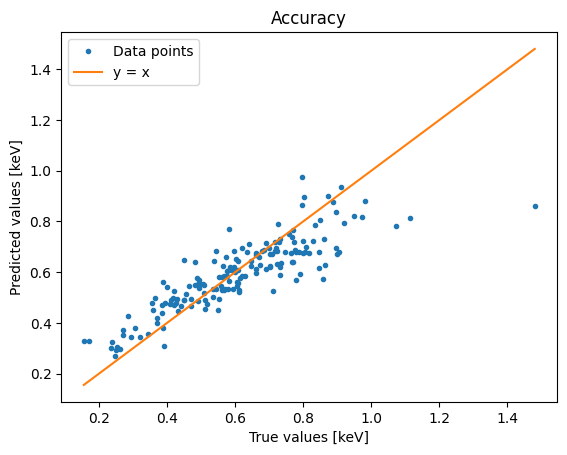

In [15]:
x = np.linspace(min(np.array(testoutput)),max(np.array(testoutput)),100)
y = x
plt.plot(testoutput,flat_ped,".",label = "Data points")
plt.plot(x,y,label="y = x")
plt.title("Accuracy")
plt.xlabel("True values [keV]")
plt.ylabel("Predicted values [keV]")
plt.legend()
plt.show()

In [16]:
# ACCURACY EVAL

errs = []

for n in range(0,len(flat_ped)):
    err = (flat_ped[n] - np.array(testoutput)[n])**2
    errs.append(err)

m_s_e = sum(errs) / len(errs)
print(m_s_e)

[0.01145793]
